In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the updated dataset with similarity scores
data = pd.read_csv('/Users/chanyeong/future-self-prediction/data/processed/processed_PTS_Bio_Pairs_01_with_similarity.csv')

In [3]:
data.head()

,Early_Bio,Later_Bio,Jaccard,BLEU,ROUGE1,ROUGE2,ROUGEL,Cosine_Similarity
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,empowered patient coalition c advocates devote...,empowered patient coalition c advocates devote...,NaN,NaN,NaN,NaN,NaN,NaN
2,bacon social house is founded on the belief th...,serving baconcentric fare in a fun high energy...,NaN,NaN,NaN,NaN,NaN,NaN
3,anos flamenguista amo minha familia amigos e o...,webcrente sonseriana vegetariana e viajante ig...,1.0,1.0,1.0,1.0,1.0,1.0
4,making women powerful keeping democracy health...,founder of voterunlead making women powerful k...,1.0,1.0,1.0,1.0,1.0,1.0


In [4]:
print(data[['Jaccard', 'BLEU', 'ROUGE1', 'ROUGE2', 'ROUGEL', 'Cosine_Similarity']].describe())


            Jaccard          BLEU        ROUGE1        ROUGE2        ROUGEL  \
count  92355.000000  92355.000000  92355.000000  92355.000000  92355.000000   
mean       0.332273      0.312669      0.385228      0.308646      0.375826   
std        0.389555      0.393649      0.394121      0.402363      0.394990   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.125000      0.057735      0.222222      0.000000      0.190476   
75%        0.666667      0.646629      0.800000      0.666667      0.800000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       Cosine_Similarity  
count       92355.000000  
mean            0.515058  
std             0.342840  
min            -0.178926  
25%             0.191828  
50%             0.470485  
75%             0.866951  
max             1.000000  


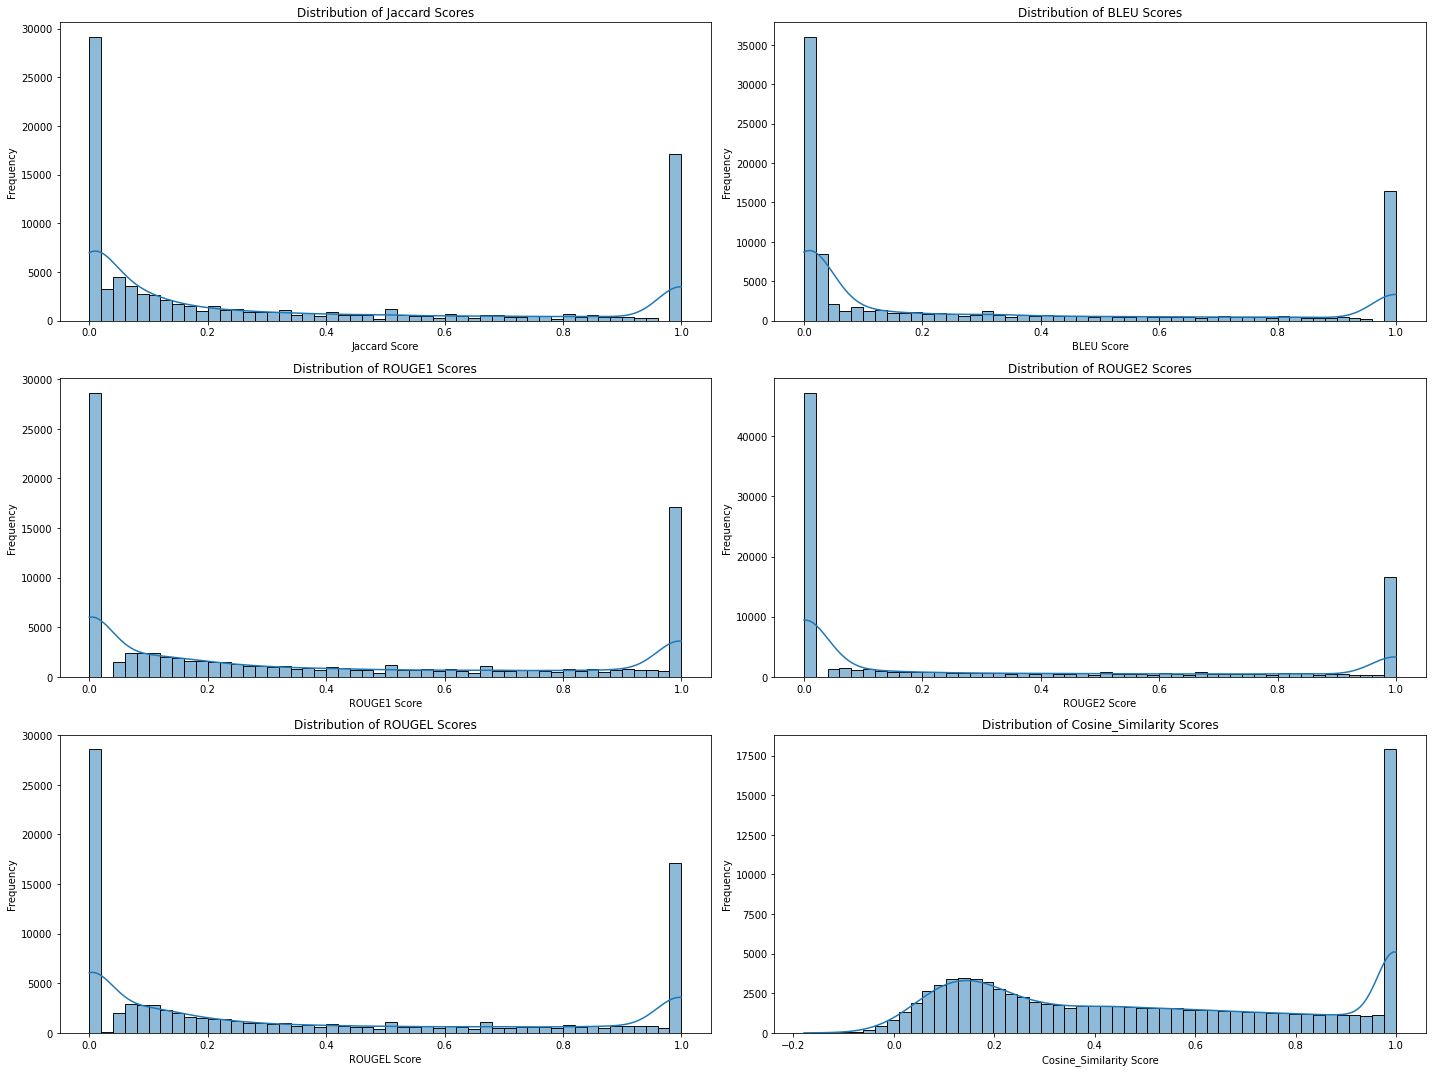

In [5]:
# Histograms of Similarity Metrics
plt.figure(figsize=(20, 15))
metrics = ['Jaccard', 'BLEU', 'ROUGE1', 'ROUGE2', 'ROUGEL', 'Cosine_Similarity']
for i, metric in enumerate(metrics, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[metric].dropna(), bins=50, kde=True)
    plt.title(f'Distribution of {metric} Scores')
    plt.xlabel(f'{metric} Score')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [10]:
# Identify Bio Pairs with Low and High Similarity
# Low Cosine Similarity
low_cosine = data.nsmallest(5, 'Cosine_Similarity')
print("Top 5 Bio Pairs with Lowest Cosine Similarity:")
print(low_cosine[['Early_Bio', 'Later_Bio', 'Cosine_Similarity']])


Top 5 Bio Pairs with Lowest Cosine Similarity:
                                               Early_Bio  \
64826  sustainable development renewable energy and s...   
15786        livelaughlove and then start all over again   
9605   painting with parkinsonspoet bird admirer surv...   
11672                                                NaN   
21744  englishreligion major stolaf college culver ac...   

                                               Later_Bio  Cosine_Similarity  
64826  sustainable development renewable energy and s...          -0.178926  
15786        livelaughlove and then start all over again          -0.157370  
9605   lover of animals especially birds and cats and...          -0.131056  
11672                                                NaN          -0.126380  
21744  a lovely chaos adding my little something to t...          -0.122744  


In [12]:
# High Cosine Similarity
high_cosine = data.nlargest(5, 'Cosine_Similarity')
print("\nTop 5 Bio Pairs with Highest Cosine Similarity:")
print(high_cosine[['Early_Bio', 'Later_Bio', 'Cosine_Similarity']])


Top 5 Bio Pairs with Highest Cosine Similarity:
                                            Early_Bio  \
18  chicago photographer at pelozaphoto vegan cook...   
20                                        go seahawks   
29  djin a club near u wed rebar port st lucie fri...   
32                                   acting out since   
62             saber dar valor as coisas mais simples   

                                            Later_Bio  Cosine_Similarity  
18  chicago photographer at pelozaphoto vegan cook...                1.0  
20                                        go seahawks                1.0  
29  come see me dj wed fri sat boardwalk ft laud t...                1.0  
32        pop music and politics but mostly pop music                1.0  
62                      audaz revel vivaz rufinoyoung                1.0  
